## Welcome to the Stock Analysis Project! 

In this notebook, we delve into a comprehensive analysis of four major tech stocks: Apple (AAPL), Amazon (AMZN), Microsoft (MSFT), and Google (GOOGL). Over a 10-year period, we explore their historical stock performance, volatility, and relationships.
At the end we build a Portfolio based on the best Sharpe Ratio we get from Monte-Carlo Simulation.

Please note that this analysis excludes considerations for dividends and stock splits. 
**It is for educational purposes only, and no financial advice is provided.**

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Gathering datasets
We use pandas_datareader to fetch historical stock data from the Stooq financial data source. The DataReader function is employed with specified parameters, including the stock symbol, data source, and date range, to retrieve and organize the data for subsequent analysis.

In [2]:
stocks=["AAPL","AMZN","MSFT","GOOGL"]

apple= data.DataReader(
name='AAPL', data_source="stooq", start="2012-01-01", end="2023-01-01"
).sort_index()
amazon= data.DataReader(
name="AMZN", data_source="stooq", start="2012-01-01", end="2023-01-01"
).sort_index()
microsoft= data.DataReader(
name="MSFT", data_source="stooq", start="2012-01-01", end="2023-01-01"
).sort_index()
google= data.DataReader(
name="GOOGL", data_source="stooq", start="2012-01-01", end="2023-01-01"
).sort_index()
                

### Initial Setup

In [3]:
stock_list=[apple,amazon,microsoft,google]

##Default Styling for all the plots
params = {
    'axes.labelsize':9,
    'axes.titlesize':15,
    'xtick.labelsize':9,
    'xtick.color':"black",
    'ytick.color':"black",
    'ytick.labelsize':9,
    'axes.titlepad': 1,
    'axes.labelpad': 5,
    'font.size':10
}
plt.rcParams.update(params)
colors=["#5a5ba1ff","#ff7161ff","#009474ff","#f0c15bff","#3c525cff"]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
sns.set_palette(palette=colors,color_codes=True)

# Analysis and Visualizations

### Plotting the opening prices for the Stocks

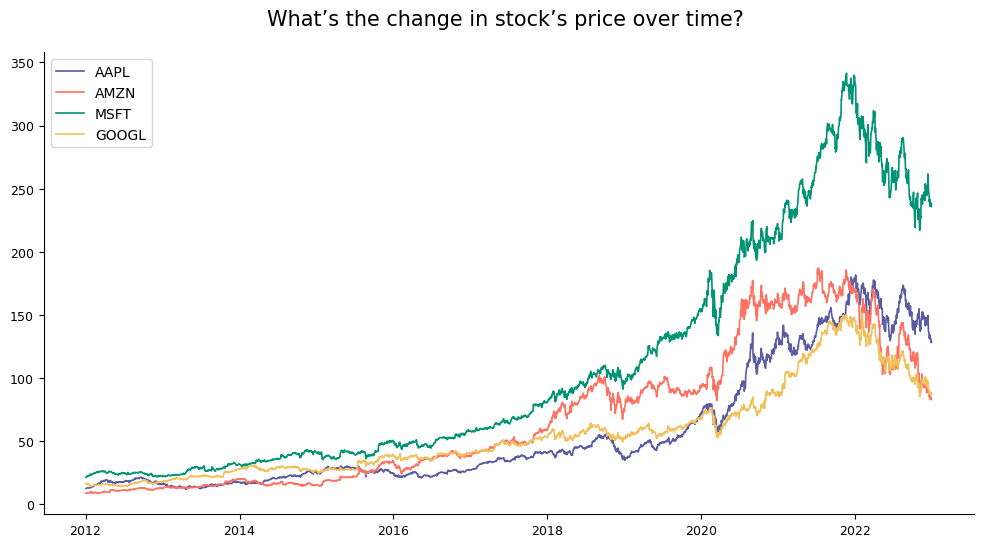

In [4]:
plt.figure(figsize=(12,6))
for stock in stock_list:
    plt.plot(stock["Open"],lw=1.2)
    
plt.legend(stocks);
sns.despine()
plt.title("What’s the change in stock’s price over time? \n");

### Plotting the Volume of Stocks traded 

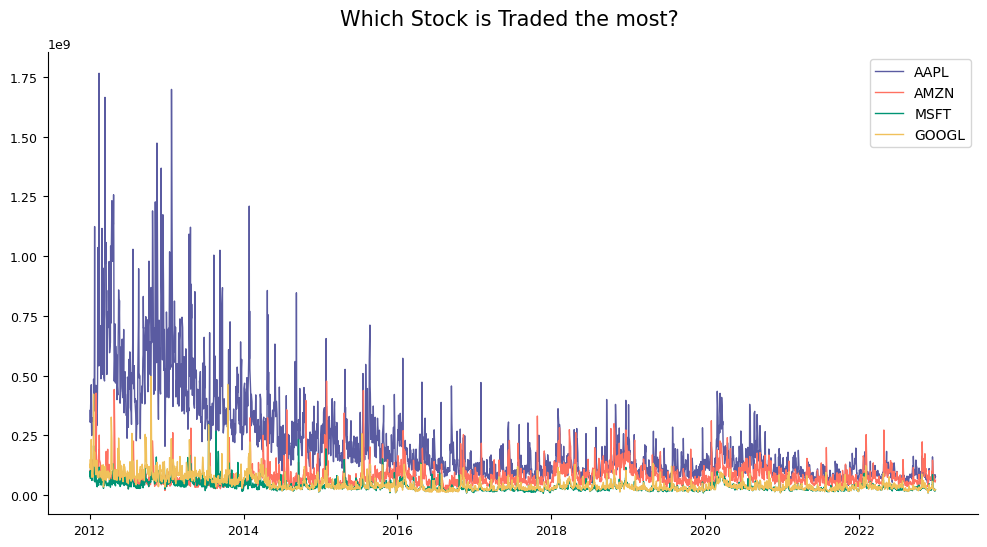

In [5]:
plt.figure(figsize=(12,6))

for stock in stock_list:
    plt.plot(stock["Volume"],lw=1) 
plt.legend(stocks);
sns.despine()
plt.title("Which Stock is Traded the most? \n");

### Insights:

- Before 2016, Apple stocks saw exceptionally high trading volumes, but post-2016, they traded in line with market norms.
- Microsoft stocks exhibit lower trading volumes compared to other stocks, possibly influenced by their higher market prices.

In [6]:
apple.Volume.idxmax()

Timestamp('2012-02-15 00:00:00')

## Daily Returns

Daily returns measure the percentage change in a stock's value from one trading day to the next. In simple terms, it tells us how much gain/loss we would have made if we bought a share and sold it the next day.


In [7]:
for stock in stock_list:
    stock["Daily_Returns"]=stock["Close"].pct_change(1)

In [8]:
df=pd.concat([apple['Daily_Returns'],amazon['Daily_Returns'],microsoft['Daily_Returns'],google['Daily_Returns'] ] ,axis=1)
df.columns=stocks

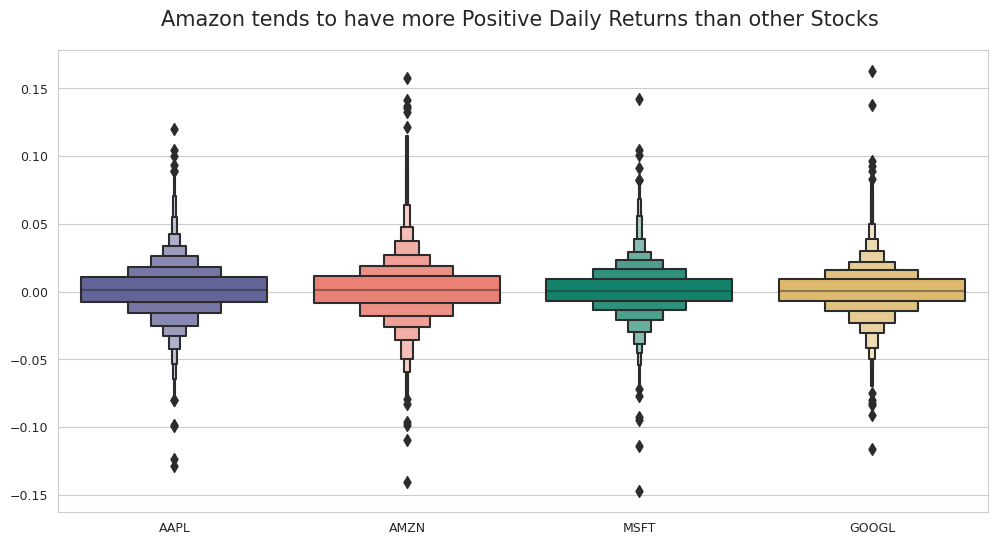

In [9]:
plt.figure(figsize=(12,6))
with sns.axes_style("whitegrid"):
    sns.despine()
    sns.boxenplot(df)
        
plt.title("Amazon tends to have more Positive Daily Returns than other Stocks \n");

### Insights:

- Amazon exhibits higher volatility, yet achieves more positive daily returns compared to other stocks.
- Google stands out for its stability, boasting the least negative daily returns among the peer stocks.

**Violin plots** combine the features of a box plot and a kernel density plot.
The width of the violin plot at different points along the axis reflects the density of data at those values.
A wider section indicates higher density.

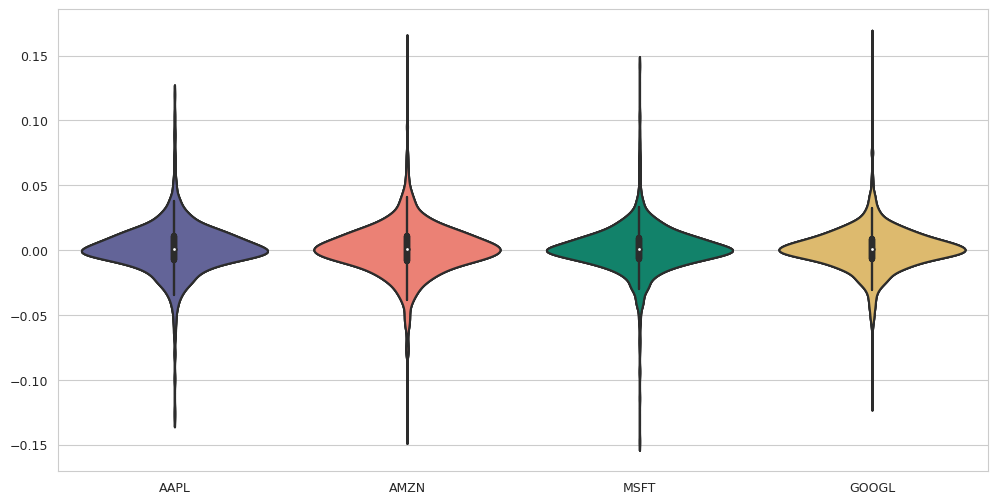

In [10]:
plt.figure(figsize=(12,6))
with sns.axes_style("whitegrid"):
    for stock in stock_list:
        sns.violinplot(df,scale="count",orient="v",gridsize=1000)

### Insights:
Microsoft's daily return distribution is characterized by a higher peak around zero and a narrower kernel density estimate, indicating a tendency for returns to cluster closely around zero. 

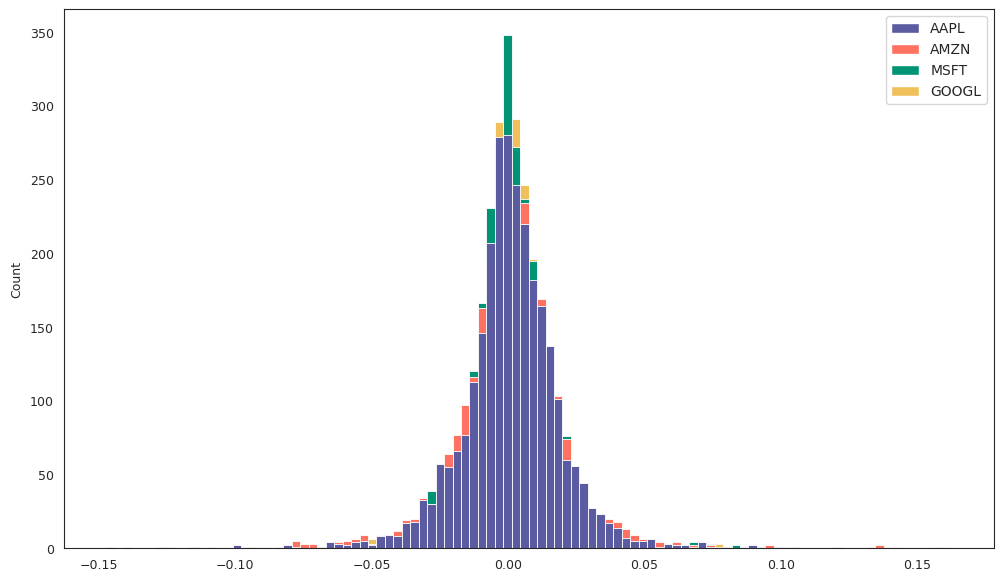

In [11]:
plt.figure(figsize=(12,7))
with sns.axes_style("white"):
    sns.histplot(data=df,bins=100,alpha=1)

## Correlation between the Daily Returns of the stocks

<Axes: >

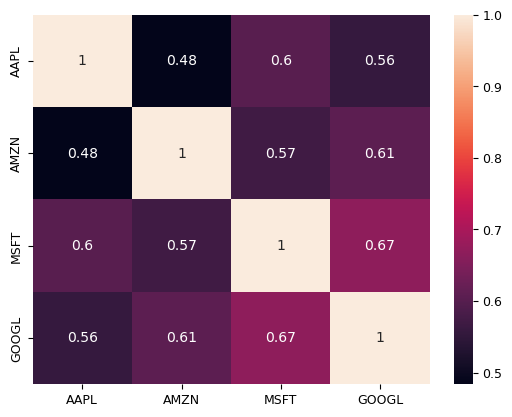

In [12]:
sns.heatmap(df.corr(),annot=True)

 - Microsoft and Google exhibit a positive correlation of 0.67 in daily returns.
- This correlation coefficient implies that when one stock experiences a positive or negative return, there is a likelihood that the other stock will follow a similar trend, though not perfectly synchronized.

## Cumulative Returns

With cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of our investment, how much would is be worth today?

In [13]:
for stock in stock_list:
    stock["Cumulative_Return"]=(1+stock["Daily_Returns"]).cumprod()

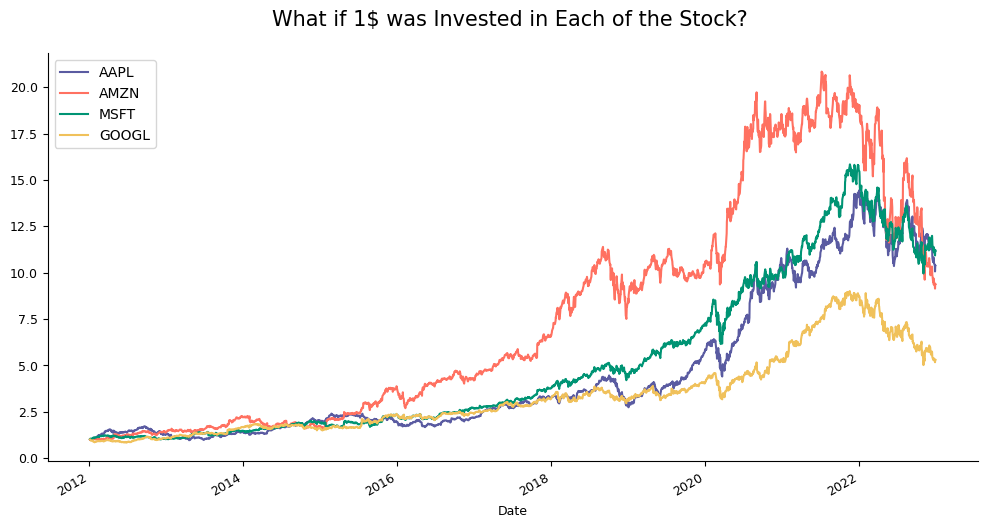

In [14]:
plt.figure(figsize=(12,6))
for stock in stock_list:
      stock["Cumulative_Return"].plot()
sns.despine()
plt.legend(labels=stocks)
ax=plt.gca()
plt.title("What if 1$ was Invested in Each of the Stock? \n");

### Insights:

- Over the 10-year period, all stocks generated profits, with Microsoft leading in cumulative returns, followed by Apple.

- Notably, Amazon experienced a significant dip post-2022, illustrating a shift in their performance dynamics.


#### Our 1\$ invested in each of the stocks in 2012, at the end of 2022 would now have been..

In [15]:
for stock in enumerate(stock_list):
    print(stocks[stock[0]],stock[1].iloc[-1,-1])

AAPL 10.377961309286068
AMZN 9.383902139306256
MSFT 11.176459622697806
GOOGL 5.303877366997295


In [16]:
# plt.figure(figsize=(12,6))
# apple["Close"].resample('A').last().pct_change(1)
# df1=pd.concat([(1 + (apple["Close"].resample('A').last().pct_change(1) ) ).cumprod(), \
#                (1 + (amazon["Close"].resample('A').last().pct_change(1) ) ).cumprod(), \
#                (1 + (microsoft["Close"].resample('A').last().pct_change(1) ) ).cumprod(), \
#                (1 + (google["Close"].resample('A').last().pct_change(1) ) ).cumprod() ] ,axis=1)
# df1.columns=stocks
# sns.lineplot(df1,dashes=False);
# plt.title("Year Wise Change in Cumulative Returns \n");
# sns.despine()

# df1.tail()

## Annual Percentage Returns

The annual percentage returns provide a clear perspective on the long-term performance of each stock, indicating how much the value has changed from the beginning to the end of each year.

In [17]:
df3=pd.concat([(apple["Close"].resample('A').last()/apple["Close"].resample('A').first() -1) *100 ,
         (amazon["Close"].resample('A').last()/amazon["Close"].resample('A').first() -1) *100,
         (microsoft["Close"].resample('A').last()/microsoft["Close"].resample('A').first() -1) *100,
         (google["Close"].resample('A').last()/google["Close"].resample('A').first() -1) *100],axis=1)
df3.columns=stocks
df3.head()

,AAPL,AMZN,MSFT,GOOGL
Date,,,,
2012-12-31,30.546814,40.127353,2.641488,6.308987
2013-12-31,4.735672,54.984260,39.542940,54.958243
2014-12-31,42.646662,-22.016735,28.418208,-4.653586
2015-12-31,-2.066821,119.074938,21.870452,46.919082
2016-12-31,12.365128,17.720843,16.508959,4.346624


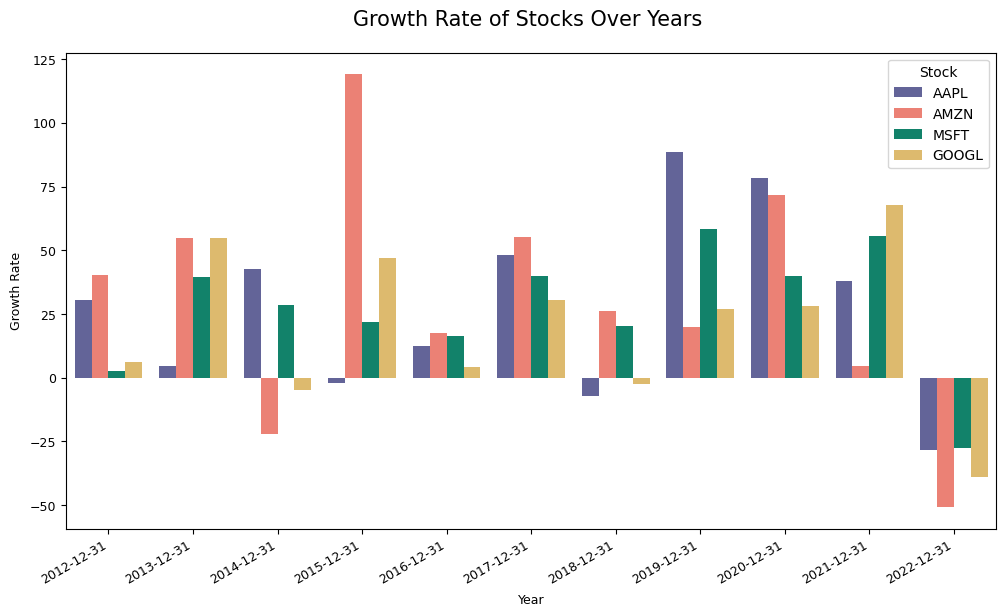

In [18]:
df_melted = df3.reset_index().melt(id_vars='Date', var_name='Stock', value_name='Growth Rate')

plt.figure(figsize=(12, 7))
sns.barplot(x=df_melted["Date"].dt.date, y='Growth Rate', hue='Stock', data=df_melted)
plt.title('Growth Rate of Stocks Over Years \n')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend(title='Stock')
plt.gcf().autofmt_xdate()

## Sharpe Ratio

The Sharpe ratio quantifies the risk-adjusted performance of an investment by assessing the excess return per unit of risk. 
In simple terms, sharpe ratio tells us how much extra return we get for taking on some risk. It helps us figure out if an investment is worth making or not.

More about [Sharpe Ratios](https://www.investopedia.com/terms/s/sharperatio.asp) and Implementation in [Python](https://www.codearmo.com/blog/sharpe-sortino-and-calmar-ratios-python)

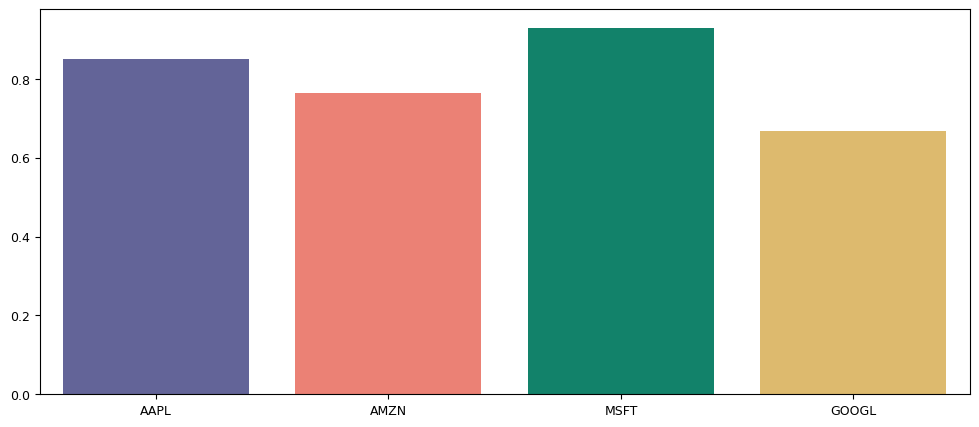

In [19]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 255 #No. of trading days in a year
rf =0.01 #Risk free return, assuming to be 0.01
sharpe_ratio=df.apply(sharpe_ratio, args=(N,rf,),axis=0)
plt.figure(figsize=(12,5))
sns.barplot(x=sharpe_ratio.index,y=sharpe_ratio);

### Insights:

- Microsoft's higher Sharpe ratio indicates that, on average, it has generated better returns for the level of risk undertaken compared to its peer stocks
- Investors often seek investments with higher Sharpe ratios as they represent a more attractive risk-return profile.

# Portfolio Allocation

Our analysis reveals that while individual stocks may have unique strengths and weaknesses, combining them into a portfolio helps spread risk and enhance overall stability.
 A portfolio is essentially a basket of stocks, each with its own weight or allocation.
This approach capitalizes on the varied performance of stocks, potentially mitigating losses and maximizing returns for a more robust investment strategy.

In [20]:
print("We have the following Stocks in our Portfolio "+ str(stocks) + "\n" )

print("Initially we will have equal weights for each of our stocks in the Portfolio \n")

weights=0.25*np.ones(4)

exp_ret = np.sum(df.mean() * weights) *252
print("Expected Return of our Porfolio "+ str(exp_ret) )

exp_vol = np.sqrt(np.dot(weights.T, np.dot(df.cov() * 252, weights)))
print("Expected Volatility of our Porfolio "+ str(exp_vol) )

SR = (exp_ret/exp_vol)
print('Sharpe Ratio ' + str(SR))


We have the following Stocks in our Portfolio ['AAPL', 'AMZN', 'MSFT', 'GOOGL']

Initially we will have equal weights for each of our stocks in the Portfolio 

Expected Return of our Porfolio 0.23870415505029427
Expected Volatility of our Porfolio 0.237487121297505
Sharpe Ratio 1.0051246305321317


# Monte-Carlo Simulation

The Monte Carlo simulation is a powerful technique used to assess the range of possible outcomes in a complex system by repeatedly sampling random inputs.
In the context of portfolio optimization, the Monte Carlo simulation helps explore various combinations of asset weights to find the optimal allocation that maximizes the Sharpe ratio.

By repeating this process for a large number of portfolios (8,000 in this case), the Monte Carlo simulation explores a wide range of possible weight combinations, allowing you to identify the portfolio allocation with the highest Sharpe ratio. This technique helps investors understand the trade-offs between risk and return and make more informed decisions about how to allocate their investments for optimal performance.

In [21]:
num_ports = 8000  
#Creating empty arrays to store our weights,expected return, expected volatility and sharpe_ratios for the given weights
all_weights = np.zeros( (num_ports,4) )
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for weight in range(num_ports):
    #Creating random weights and then rebalancing to 1
    weights=np.random.random(4)
    weights = weights / np.sum(weights)
    
    #Saving the weights
    all_weights[weight]=weights
    
    #Calulating returns,volatility and sharpe ratio for the random weights
    ret_arr[weight]=np.sum(df.mean() * weights) *252
    vol_arr[weight]=np.sqrt(np.dot(weights.T, np.dot(df.cov() * 252, weights)))
    sharpe_arr[weight] = ( ret_arr[weight] / vol_arr[weight] )

### Portfolio Statistics

In [22]:
max_sharpe=sharpe_arr.max()
print("Max sharpe_ratio we could get is "+ str(max_sharpe))
ind_max_sharpe=sharpe_arr.argmax()

max_ret=ret_arr[ind_max_sharpe]
max_vol=vol_arr[ind_max_sharpe]
max_weight=all_weights[ind_max_sharpe]
print("For these weights "+ str(all_weights[ind_max_sharpe] )+ " \nCorresponding to:  "+ str(stocks))
print("With "+ str(max_ret)+" return and \n")
print("With"+ str(max_ret)+ " volatility")


Max sharpe_ratio we could get is 1.0538500904861445
For these weights [0.34883062 0.19002768 0.45737206 0.00376963] 
Corresponding to:  ['AAPL', 'AMZN', 'MSFT', 'GOOGL']
With 0.25528769465204404 return and 

With0.25528769465204404 volatility


**The max sharpe_ratio we could get is 1.053**

### Plotting the simulation of Returns and Volatility to find the Optimal Sharpe Ratio

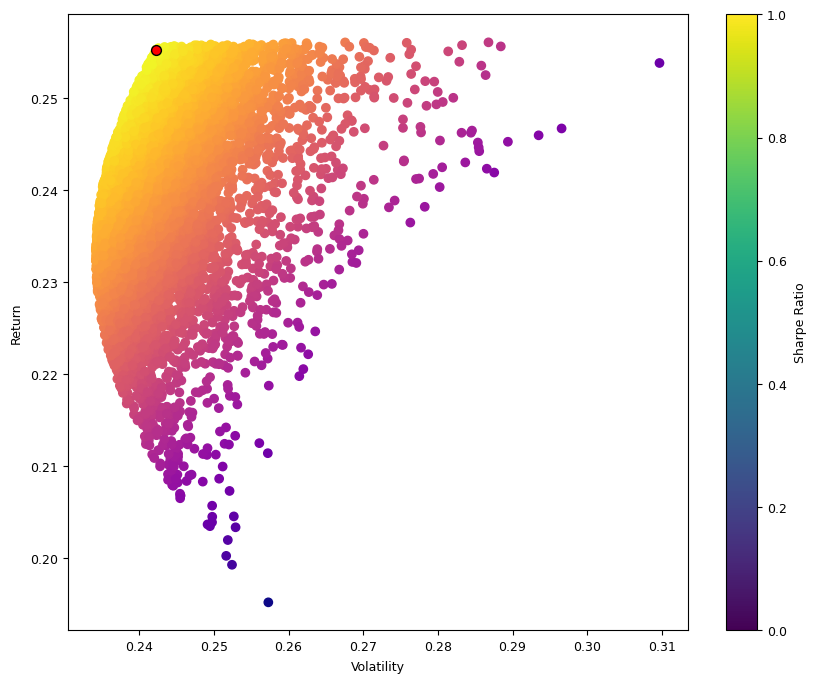

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')

plt.scatter(max_vol,max_ret,c="red",s=50,edgecolors='black')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

In [24]:
df2=pd.concat([apple['Cumulative_Return'],amazon['Cumulative_Return'],
               microsoft['Cumulative_Return'],
               google['Cumulative_Return'] ] ,axis=1)
df2.columns=stocks
df2=df2*max_weight
df2["Portfolio"]=df2.sum(axis=1)

In [25]:
df3=pd.concat([apple['Cumulative_Return'],amazon['Cumulative_Return'],
               microsoft['Cumulative_Return'],
               google['Cumulative_Return'],df2["Portfolio"] ] ,axis=1)
stocks.append("Portfolio")
df3.columns=stocks
df3.head()

,AAPL,AMZN,MSFT,GOOGL,Portfolio
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,0.000000
2012-01-04,1.005336,0.991510,1.023828,1.004328,1.011163
2012-01-05,1.016566,0.992068,1.034468,0.990382,1.020000
2012-01-06,1.027237,1.019997,1.050108,0.976886,1.036132
2012-01-09,1.025639,0.997375,1.036780,0.935467,1.025024


### Comparing how our Portfolio would have performed in comparison to individual stocks

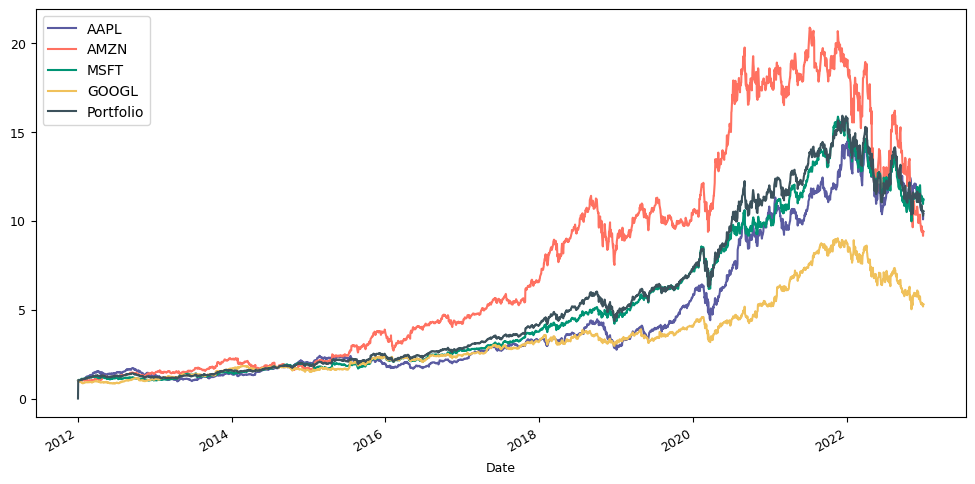

In [26]:
df3.plot(figsize=(12,6));

In [27]:
final_value=df3.iloc[-1,-1]
final_value

10.535145944235731

With the given weights, our **1\$** would have now have been **10.543$**